In [275]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [276]:
data_trappings = pd.read_excel('attention.xlsx', sheet_name = 'Справочник точек')
data_target = pd.read_excel('attention.xlsx', sheet_name = 'Выручка по обучающей выборке')

In [277]:
data_trappings.head(10)

,id точки,Адрес,Широта,Долгота,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955.0,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",55.118272,51.843127,2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,...,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007.0,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",83.696799,53.356954,2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,...,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366.0,"Амурская область, Благовещенск, улица Мухина, 114",127.510357,50.280435,2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810.0,"Архангельская обл, г. Архангельск , Троицкий п...",40.528249,64.532316,2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041.0,"Архангельская обл, г. Архангельск, Троицкий пр...",40.526317,64.534327,2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,...,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая
5,15087.0,"Архангельская обл, г. Архангельск, ул. Воскрес...",40.535400,64.541900,2014-11-20 00:00:00,NaT,416,без сквозного прохода,60000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,1,1,NaN,10.5,71.418989,67.035714,Тестовая
6,15621.0,"Архангельская обл, г. Северодвинск, ул. Ломоно...",39.785522,64.550364,2003-11-09 00:00:00,NaT,178,сквозной проход,20000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,0,0.0,8.0,82.880454,64.034483,Обучающая
7,15775.0,"Астраханская обл, г. Астрахань, ул. Боевая, до...",48.023172,46.338313,2014-02-05 00:00:00,NaT,521,без сквозного прохода,130000.0,ТЦ,...,1,с 10:00 до 22:00,NaN,0,1,1.0,8.0,38.935806,62.827586,Обучающая
8,16102.0,"Барнаул г, Ленина пр-кт, дом № 102В, ТЦ ""Пионер""",83.764275,53.362114,2017-06-07 00:00:00,NaT,369,отдельный вход с улицы + сквозной проход,80000.0,ТЦ,...,1,с 10:00 до 22:00,0.0,0,0,0.0,1.5,27.525274,65.500000,Обучающая
9,16119.0,"Башкортостан Респ, Уфа г, Цюрупы ул, дом № 97 ...",55.958263,54.736556,2018-05-23 00:00:00,NaT,662,сквозной проход,48000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,83.191620,71.428571,Тестовая


In [278]:
data_target.head(10)

,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,11366.0,2.457093e+05,3.010247e+05,4.061998e+05,2.956029e+05,2.681792e+05,2.665790e+05,202667.039355,2.073470e+05,2.373932e+05,...,2.710840e+05,2.988453e+05,2.777763e+05,2.709029e+05,2.801061e+05,2.434488e+05,236709.816452,248268.778333,2.966371e+05,3.144569e+05
1,11810.0,2.702458e+05,2.979648e+05,4.061982e+05,2.324333e+05,2.293177e+05,2.514033e+05,242000.555806,2.604071e+05,2.670512e+05,...,2.454024e+05,2.735150e+05,2.400883e+05,1.962605e+05,2.289206e+05,2.040588e+05,207104.013135,203499.409840,2.060130e+05,2.186364e+05
2,15041.0,1.719730e+05,1.981414e+05,2.602157e+05,2.053160e+05,1.870599e+05,1.985910e+05,178250.637781,1.870947e+05,2.110000e+05,...,1.741546e+05,1.731902e+05,2.403968e+05,2.414946e+05,2.648738e+05,2.274612e+05,249503.230968,251805.680000,2.631530e+05,2.699130e+05
3,15775.0,4.090330e+05,4.688165e+05,5.827175e+05,4.428075e+05,3.716893e+05,4.284310e+05,365894.971255,3.842665e+05,3.855155e+05,...,4.319093e+05,4.935711e+05,4.085755e+05,3.870814e+05,4.183988e+05,3.623952e+05,393423.329032,387866.910000,4.213874e+05,4.813301e+05
4,16102.0,4.376932e+05,5.100772e+05,6.021076e+05,4.657798e+05,4.234489e+05,4.144766e+05,370944.770968,3.920898e+05,4.167973e+05,...,3.784299e+05,4.535115e+05,3.888497e+05,3.692232e+05,3.923890e+05,3.285932e+05,350885.291935,369367.358333,4.275750e+05,4.725080e+05
5,16418.0,1.097856e+06,1.251315e+06,1.498360e+06,1.172858e+06,1.061769e+06,1.084432e+06,950878.991935,1.012459e+06,1.084123e+06,...,1.245772e+06,1.363428e+06,1.176113e+06,1.220379e+06,1.197103e+06,1.029584e+06,882819.224194,972544.195833,1.014446e+06,1.223028e+06
6,17684.0,3.129239e+05,3.561948e+05,4.684890e+05,3.693306e+05,3.133890e+05,3.145269e+05,273002.095484,2.989328e+05,3.377902e+05,...,3.209480e+05,3.667622e+05,3.272357e+05,3.092432e+05,3.298805e+05,2.610888e+05,278375.602581,303050.944000,3.459464e+05,3.936592e+05
7,17983.0,2.727651e+05,3.223121e+05,3.939502e+05,2.558318e+05,2.550540e+05,2.811618e+05,238485.316129,2.625821e+05,2.556525e+05,...,2.868725e+05,3.068205e+05,2.581821e+05,NaN,NaN,2.600626e+05,236028.800000,238242.666667,2.580911e+05,2.912130e+05
8,18527.0,1.248466e+05,1.874622e+05,1.997985e+05,1.378961e+05,1.456133e+05,1.387710e+05,130081.756129,1.475076e+05,1.550888e+05,...,1.090558e+05,1.279568e+05,1.086916e+05,1.058611e+05,1.103069e+05,9.036398e+04,109886.919355,129277.138000,9.605134e+04,1.022426e+05
9,18531.0,3.684455e+05,4.265069e+05,5.762025e+05,4.070654e+05,3.573006e+05,3.646116e+05,312045.963871,3.375638e+05,3.473390e+05,...,4.570747e+05,5.294037e+05,4.297646e+05,4.227043e+05,4.198224e+05,3.549280e+05,398751.692206,398162.194000,4.586802e+05,5.117739e+05


## Магазины типа street в тестовой выборке

In [279]:
value_street = 0
for sort, sample in zip(data_trappings['Формат магазина'], data_trappings['Выборка']):
    if (sort.startswith('S') or sort.startswith('C')) and sample.startswith('Т'):
        value_street += 1

print('Количество магазинов типа street в тестовой выборке:', value_street)

Количество магазинов типа street в тестовой выборке: 4


## Магазины с бесплатной парковкой

In [280]:
value_freeParking = 0
for parking in data_trappings['Парковка']:
    if type(parking) == str and (parking.startswith('б') or parking.startswith('Б')):
        value_freeParking += 1

print('Количество магазинов с бесплатной парковкой:', value_freeParking)

Количество магазинов с бесплатной парковкой: 157


## Выручка магазинов формата мини ТЦ за 2016 год

In [281]:
revenue = 0
revenue_2016 = {}
date_2016 = [
    '2016-01-01',
    '2016-02-01',
    '2016-03-01',
    '2016-04-01',
    '2016-05-01',
    '2016-06-01',
    '2016-07-01',
    '2016-08-01',
    '2016-09-01',
    '2016-10-01',
    '2016-11-01',
    '2016-12-01',
]

for market_id, sort in zip(data_trappings['id точки'], data_trappings['Формат магазина']):
    if sort.startswith('м') or sort.startswith('М'):
        revenue_2016[market_id] = 0

for market_id in data_target['id точки']:
    if market_id in revenue_2016:
        revenue = data_target.loc[data_target['id точки'] == market_id, date_2016].sum(axis=1)
        str_revenue = str(revenue)[6:18]
        if str_revenue == ' 0.0\ndtype: ':
            float_revenue = 0
        else:
            float_revenue = float(str_revenue)
        revenue_2016[market_id] += float_revenue

In [282]:
print(revenue_2016)

{18331.0: 0, 18728.0: 5781313.0, 41824.0: 4213653.0, 41933.0: 1495435.0, 42039.0: 0, 42067.0: 8598843.0, 42113.0: 0, 42163.0: 0, 42192.0: 2393004.0, 42219.0: 2286680.0, 42242.0: 3668217.0, 42276.0: 0, 42278.0: 0, 42355.0: 912293.7889, 42368.0: 8115440.0, 42383.0: 7198378.0, 42422.0: 2907795.0, 42458.0: 3766019.0, 42496.0: 3812571.0, 42504.0: 3044131.0, 42548.0: 4.260343, 42598.0: 0, 42618.0: 0, 42645.0: 0, 42683.0: 1.55074, 42720.0: 2.026811, 42743.0: 3.832844, 42803.0: 0, nan: 0, 2633930.0: 0}


In [283]:
print('Средняя выручка магазинов формата мини ТЦ за 2016 год:', sum(revenue_2016.values())/len(revenue_2016))

Средняя выручка магазинов формата мини ТЦ за 2016 год: 1939792.815321267


## Соотношение обучающей и тестововй выборки

In [284]:
learning_data = 0
test_data = 0
zero_data = 0

for data in data_trappings['Выборка']:
    if str(data).startswith('О'):
        learning_data += 1
    elif str(data).startswith('Т'):
        test_data += 1
    else:
        zero_data += 1

In [285]:
print('Соотношение данных обучения и теста: ', learning_data/test_data)
print('Данных для обучения:', learning_data)
print('Данных для теста:', test_data)
print('Неинтерпретированных данных: ', zero_data)

Соотношение данных обучения и теста:  2.0128205128205128
Данных для обучения: 157
Данных для теста: 78
Неинтерпретированных данных:  11


In [286]:
data_trappings = data_trappings.replace('цоколь', int(0))

for floor in data_trappings['Этаж']:
    if len(str(floor)) > 3:
        data_trappings = data_trappings.replace(floor, 'NaN')

In [287]:
target = {}
fitures = list(data_target.columns.values)
data_target['revenues'] = data_target.sum(axis = 1)-data_target['id точки']
idRevenue = np.array(data_target['id точки'])

In [288]:
for id_point, revenue in zip(data_target['id точки'], data_target['revenues']):
    target[id_point] = revenue
areas = []
areasMC = []
revenues = []
for id_point, area, areaMC in zip(data_trappings['id точки'], data_trappings['Площадь магазина'], data_trappings['Площадь ТЦ']):
    if id_point in target:
        areas.append(area)
        areasMC.append(areaMC)
        revenues.append(target[id_point])

Text(0.5, 1.0, 'Зависимость выручки от площади точки')

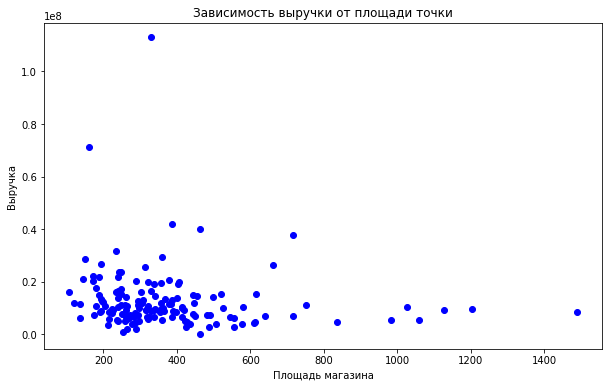

In [291]:
plt.figure(figsize = (10, 6))
plt.scatter(areas, revenues, c = 'b')
plt.xlabel('Площадь магазина')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от площади точки')

Text(0.5, 1.0, 'Зависимость выручки от площади ТЦ')

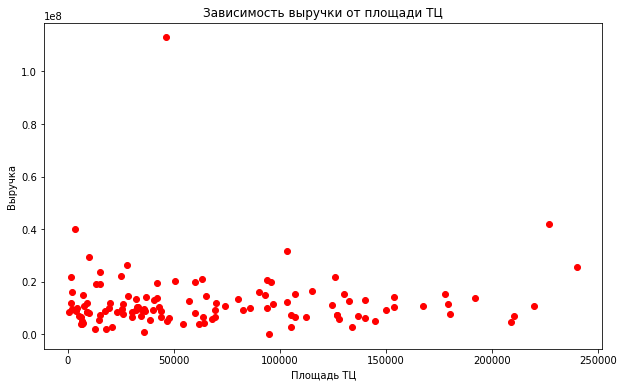

In [292]:
plt.figure(figsize = (10, 6))
plt.scatter(areasMC, revenues, c = 'r')
plt.xlabel('Площадь ТЦ')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от площади ТЦ')